<a href="https://colab.research.google.com/github/atsu8864/Atcoder/blob/main/%E6%BC%94%E7%BF%921/Chap1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1章・演習問題（１）～ディープラーニング入門～
所要時間：1時間


作成者：こしあん

## 最小二乗法

### データを読み込もう
[ボストンの不動産価格](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)のデータから最小二乗法で回帰分析をすることを目標とする。データはScikit-learnというライブラリから読み込める。

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
print(data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

**問題1** データはNumpy配列で格納されている。説明変数をX、目的変数（価格）をyとして、X, yのshapeを表示せよ。shapeは「X.shape」のようにすると表示できる。

In [ ]:
### ここにコードを入力
X = data["data"]
y = data["target"]
print(X.shape)
print(y.shape)
###

(506, 13)
(506,)


```
(506, 13) (506,)
```

と表示されればOK。Xは506個のサンプルがあり、13個の説明変数があるという意味である。

### 入力層と出力層を定義しよう
TensorFlowというライブラリの「Keras」をAPIを使う。ライブラリを読み込む

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers

2行目はKerasのlayers（レイヤー各種）をlayersとして読み込むよという意味である。こう書くことで、タイプを省略できる。

入力層と出力層からなるモデルを作る。入力層は、

```python
layers.Input((入力次元, ))
```

とすることで作れる。

**問題2** ボストンデータの説明変数は13次元である。入力次元が13の入力層を「inputs」という変数として作ろう。

In [ ]:
### ここにコードを入力
inputs = layers.Input((13, ))
###
print(inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 13), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


inputsをprintで表示すると、

```console
Tensor("input_1:0", shape=(?, 13), dtype=float32)
```

と表示されるはずである。

次に出力層は、

```python
layers.Dense(出力次元)(前の層の変数)
```

とすることで作れる。ここで活性化関数（後述）は必要はない。**出力層の場合は、Dense()の後に()がもう一つあることに注意**しよう（[Functional API](https://keras.io/ja/getting-started/functional-api-guide/)という）。この意味は、1つ目の括弧がレイヤーのインスタンスを作るための設定で、2つ目の括弧が作ったインスタンスに対して、前の層との計算（計算グラフという）を定義しているという意味である。ここでは理解できなくても良い。

**問題3**: 目的変数は1次元である。出力次元が1次元の出力層を「outputs」として作ろう。

In [ ]:
### ここにコードを入力
outputs = layers.Dense(1)(inputs)
###
print(outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")


と表示されるはずである。他にメッセージが出ても特に気にしなくて良い。

```console
Tensor("dense_1/BiasAdd:0", shape=(?, 1), dtype=float32)
```

### モデルの作成
入力層と出力層ができたので、訓練するためのモデルができる。モデルは、

```console
tf.keras.models.Model(入力層, 出力層)
```

とすることで定義できる。

**問題4**：問題2、3で定義した入力層「inputs」、出力層「outputs」を使ってモデルを「model」として定義せよ

In [ ]:
### ここにコードを入力
model = tf.keras.models.Model(inputs, outputs)
###
print(model)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


以下のような出力になるはずである。

```console
<tensorflow.python.keras.engine.training.Model object at 0x7f3fa9e29f98>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
=================================================================
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
```

「Model:"model"」以下のずらっとした表示は、model.summary()によるものである。**定義したモデルが正しいかどうか確認するのに非常に便利**なので、ぜひ活用しよう。

### モデルをコンパイルしよう
ここではモデルを訓練可能な形にコンパイルする。具体的には**オプティマイザーと損失関数**を定義する。

オプティマイザーは**[Adam](https://arxiv.org/abs/1412.6980)**というものを使う。特に説明はしないが、この本では高性能で便利なオプティマイザーぐらいに認識しておけば問題ない。

損失関数は最小二乗法なので、平均二乗誤差（Mean Squared Error）を用いる。

コンパイルでは次のようにする。

```console
model.compile(オプティマイザー, 損失関数)
```

**問題5**:オプティマイザーをAdam、損失関数を平均二乗誤差としてモデルをコンパイルせよ。ただし、オプティマイザーの引数は"adam"、損失関数の引数は"mean_squared_error"とすること。

In [ ]:
### ここにコードを入力
model.compile("adam", "mean_squared_error")
###
print(model)

特に見た目は代わりはないが、これでコンパイルは完了している（オブジェクトのIDは変わっても問題ない）

```console
<tensorflow.python.keras.engine.training.Model object at 0x7f3fa9e29f98>
```

### モデルを訓練しよう
いよいよモデルを訓練する。コンパイル済みのモデルに対して、

```
model.fit(説明変数, 目的変数, epochs=エポック数)
```

とすると訓練できる。ここでエポックとは、**データ全体を何周させるか**を意味する。例えば、100エポックとは損失が収束するまでに、データ全体を100回反復させて訓練させるという意味である。

**問題6** 問題1で作ったXを説明変数、yを目的変数としてモデルを訓練せよ。ただしエポック数は10とする。

In [ ]:
### ここにコードを入力
model.fit(X, y, epochs=10)
###

Epoch 1/10
16/16 [==============================] - 1s 1ms/step - loss: 27947.9766
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 24181.5723
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 21027.7520
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 18257.2617
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 16084.9082
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 14290.8330
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 12851.8701
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 11694.1182
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 10755.3740
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 10032.5234


このように表示されるはずである。

```console
Train on 506 samples
Epoch 1/10
506/506 [==============================] - 0s 258us/sample - loss: 109606.3910
Epoch 2/10
506/506 [==============================] - 0s 39us/sample - loss: 100083.8524
Epoch 3/10
506/506 [==============================] - 0s 39us/sample - loss: 91153.2286
Epoch 4/10
506/506 [==============================] - 0s 38us/sample - loss: 82800.2401
Epoch 5/10
506/506 [==============================] - 0s 38us/sample - loss: 75048.2213
Epoch 6/10
506/506 [==============================] - 0s 37us/sample - loss: 67903.5238
Epoch 7/10
506/506 [==============================] - 0s 38us/sample - loss: 61303.2298
Epoch 8/10
506/506 [==============================] - 0s 38us/sample - loss: 55130.7411
Epoch 9/10
506/506 [==============================] - 0s 37us/sample - loss: 49540.4859
Epoch 10/10
506/506 [==============================] - 0s 38us/sample - loss: 44403.3666
<tensorflow.python.keras.callbacks.History at 0x7ffb2ab3e780>
```

少しのコードでかなりかっこよく表示されるのが、Kerasの良い点である。

### 予測をしよう
訓練したモデルから予測をしてみよう。予測は、

```
model.predict(説明変数)
````

とすればできる。

**問題7** 説明変数Xから予測を求めy_predとして定義せよ。

In [ ]:
### ここにコードを入力
y_pred = model.predict(X)
###
print(y_pred[:10])
print(y[:10])


[[55.543606]
 [76.448784]
 [79.57955 ]
 [92.016914]
 [90.5827  ]
 [87.0798  ]
 [55.153732]
 [45.764973]
 [45.228596]
 [44.24118 ]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


以下のような結果になる。かなり誤差が大きいが、モデルや前処理を簡略化しすぎているためである。もう少しエポック数を増やせば改善されるだろう。

```
[[215.50664]
 [192.01524]
 [193.26166]
 [195.1068 ]
 [194.43839]
 [192.64748]
 [216.05788]
 [211.14967]
 [208.43497]
 [209.50926]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
```

**問題8（オプション）** このケースでロスの収束が遅い理由は、Normalization（正規化、標準化）にある。入力層と出力層の間に[BatchNormalization](https://arxiv.org/abs/1502.03167)を入れて訓練してみよう。BatchNormalizationは、

```
inputs = layers.Input(...)
x = layers.BatchNormalization()(inputs)
x = layers.Dense(...)(x)
```

のようにすると使える（計算の流れに応じてxを連鎖的に括弧内に入れて良い）。

In [ ]:
### ここにコードを入力
inputs = layers.Input((13, ))
x = layers.BatchNormalization()(inputs)
x = layers.Dense(1)(inputs)
model = tf.keras.models.Model(inputs, x)
###

In [ ]:
model.compile("adam", "mean_squared_error")
model.fit(X, y, epochs=10)


Epoch 1/10
16/16 [==============================] - 1s 3ms/step - loss: 979.8296
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 845.5256
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 737.1309
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 655.5974
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 581.3448
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 522.8220
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 474.2471
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 435.1137
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 402.7609
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 374.6259


BatchNormalization（BatchNorm）なしでは10エポックでロスが1300以上だったのに、ありでは500ちょいになった。**BatchNormなどのNormalizationはニューラルネットワークの頻出レイヤー**となっているので覚えておきたい。

```console
Train on 506 samples
Epoch 1/10
506/506 [==============================] - 0s 337us/sample - loss: 602.0362
Epoch 2/10
506/506 [==============================] - 0s 43us/sample - loss: 596.7016
Epoch 3/10
506/506 [==============================] - 0s 38us/sample - loss: 590.9559
Epoch 4/10
506/506 [==============================] - 0s 39us/sample - loss: 585.7139
Epoch 5/10
506/506 [==============================] - 0s 38us/sample - loss: 581.0755
Epoch 6/10
506/506 [==============================] - 0s 40us/sample - loss: 575.9988
Epoch 7/10
506/506 [==============================] - 0s 43us/sample - loss: 571.4993
Epoch 8/10
506/506 [==============================] - 0s 37us/sample - loss: 567.0086
Epoch 9/10
506/506 [==============================] - 0s 39us/sample - loss: 561.7356
Epoch 10/10
506/506 [==============================] - 0s 41us/sample - loss: 556.9119
<tensorflow.python.keras.callbacks.History at 0x7f3fa0a6a828>
```

### Validationをしよう
実は今までのやり方は機械学習としては若干不適切である。**ニューラルネットワークの訓練を損失を減らす＝汎化性能が上がるではない**。訓練データを何度も訓練しているうちに、ニューラルネットワーク全体が訓練データ全体に過剰適合（**オーバーフィッティング**という）してしまうからである。

そのため、Validationといい、訓練データには使わないデータ（（交差）検証や、Validation,テストデータなどという）でロスを計測し、訓練誤差ではなくValidation誤差を最小化することで汎化性能を高めるということを行う。

Validationデータの作成は、単にデータを分割すればよい。Sklearnにある[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)という関数を使う。

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(354, 13) (152, 13)
(354,) (152,)


これはデータ全体を「訓練：テスト＝7：3」で分割している。適切なテストデータのサイズというのは難しいが、サンプル数が少ない場合は30%程度にするのが、機械学習では慣習的な設定になっている。

また、「random_state」で適当な値（**乱数シード**という）を設定しておくと、分割が実行するたびに変わることがないことが保証される（分割がランダムだから）。ぜひ設定しておこう。逆に設定しないケースでは、訓練とテストの間で**リーク（Leakage）**の恐れがあり危険である。

問題8にトライした場合は、BatchNormなしのモデルに切り替えるため以下のコードを実行しておこう。

In [ ]:
inputs = layers.Input((13,))
x = layers.Dense(1)(inputs)
model = tf.keras.models.Model(inputs, x)
model.compile("adam", "mean_squared_error")

また、「Validationをする場合はモデルを作り変える必要があるのではないか？」と思うかもしれないが、その必要はない。なぜなら、モデルはあくまで計算の流れを定義しているからであって、どのデータで計算するかに依存しないからである。


**問題9** ボストンの回帰問題をValidationありで訓練せよ。fitは以下のように変える。エポック数は10とすること。

```
model.fit(訓練データのX, 訓練データのy, validation_data=(テストデータのX, テストデータのy), epochs=エポック数)
```

In [ ]:
### ここにコードを入力
model.fit(X, y, validation_data=(X_test, y_test), epochs=10)
###

Epoch 1/10
16/16 [==============================] - 1s 15ms/step - loss: 10364.0713 - val_loss: 8411.2812
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 8163.8188 - val_loss: 6583.5239
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 6447.9536 - val_loss: 5272.4805
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 5264.6431 - val_loss: 4345.3315
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 4393.7065 - val_loss: 3762.8853
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 3828.2585 - val_loss: 3373.4724
Epoch 7/10
16/16 [==============================] - 0s 6ms/step - loss: 3449.3853 - val_loss: 3108.2805
Epoch 8/10
16/16 [==============================] - 0s 6ms/step - loss: 3166.5601 - val_loss: 2926.3523
Epoch 9/10
16/16 [==============================] - 0s 7ms/step - loss: 2966.0222 - val_loss: 2772.4927
Epoch 10/10
16/16 [==============================] - 0s 5ms/st

lossとval_lossという2つの項目が表示された。このケースでは2つのロスが連動しているが、多くのケースでは、lossが減っている一方でval_lossが減らないという現象がよく見られる（オーバーフィッティング）。

```
Train on 354 samples, validate on 152 samples
Epoch 1/10
354/354 [==============================] - 0s 660us/sample - loss: 11927.2519 - val_loss: 9720.2536
Epoch 2/10
354/354 [==============================] - 0s 56us/sample - loss: 9928.6661 - val_loss: 8003.6122
Epoch 3/10
354/354 [==============================] - 0s 54us/sample - loss: 8238.6357 - val_loss: 6588.3088
Epoch 4/10
354/354 [==============================] - 0s 54us/sample - loss: 6849.5613 - val_loss: 5466.1203
Epoch 5/10
354/354 [==============================] - 0s 53us/sample - loss: 5714.5182 - val_loss: 4591.7654
Epoch 6/10
354/354 [==============================] - 0s 53us/sample - loss: 4861.6986 - val_loss: 3953.9727
Epoch 7/10
354/354 [==============================] - 0s 54us/sample - loss: 4179.3592 - val_loss: 3454.7768
Epoch 8/10
354/354 [==============================] - 0s 57us/sample - loss: 3654.1668 - val_loss: 3080.9677
Epoch 9/10
354/354 [==============================] - 0s 57us/sample - loss: 3245.3685 - val_loss: 2807.0427
Epoch 10/10
354/354 [==============================] - 0s 49us/sample - loss: 2934.2802 - val_loss: 2615.1973
<tensorflow.python.keras.callbacks.History at 0x7f3fa06649b0>
```

訓練損失が下がれば万々歳ということではないのに注意しよう！

ここで学んだことは以下の通りだ。

* TensorFlow、特にKerasの最低限の使い方
* Kerasにおける最小二乗法
* Validationの必要性

## 手書き数字の分類
基本的なKerasの使い方がわかったので、機械学習のチュートリアルと言われる手書き数字（**MNIST**データセット）にチャレンジしてみよう。MNISTは以下のようにロードできる。

```
(訓練X, 訓練y), (テストX, テストy) = tf.keras.datasets.mnist.load_data()
```

**問題10**:訓練X=X_train, 訓練y=y_train, テストX=X_test, テストy=y_testとしてMNISTをロードせよ。また各変数のshapeを確認せよ。

In [ ]:
### ここにコードを入力
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
###
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


このように表示される。

```
Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
```

訓練が6万データ、テストが1万データである。MNISTはtrain_test_splitを使わなくても最初から分割されているので、そのままでValidationはできる。

yはともかく「Xのshapeはなんだ？」と思うかもしれないが、これがTensorFlowの名前にもある「テンソル」である。何も言わなかったが、ボストンの説明変数は(506, 13)なので行列であった。テンソルとはこの軸が1つ増えただけである（もっと厳密には行列もテンソルの一部）。テンソルというと仰々しいので、**3次元配列**ぐらいに考えておくのをおすすめする。

### データを見てみよう
手書き数字のデータといっても、どのへんが手書き数字なのだろうか？　

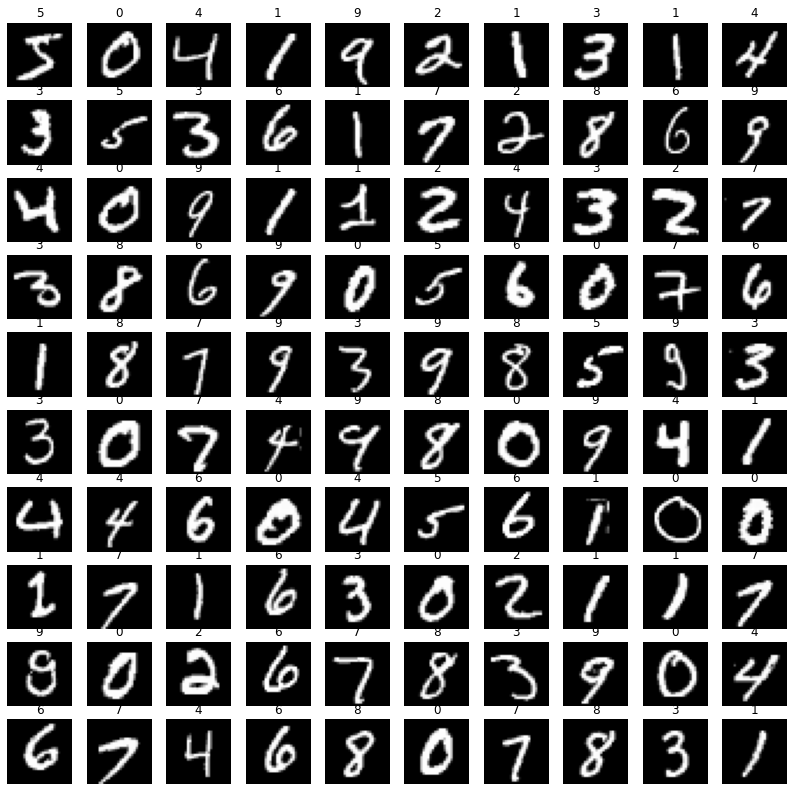

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(y_train[i])
    ax.axis("off")

では、ここでいう説明変数とは具体的に何を示すのだろうか。答えはピクセル値である。

**問題11**: X_trainの0番目の値をprintで表示せよ。説明変数のピクセル値とは、どう格納されているのか確認せよ。

In [ ]:
### ここにコードを入力
print(X_train[0])
###

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

このような出力になる。行で見切れているが、なんとなく5の形っぽいのがわかるだろう。

```
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
   25   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253
  150  27   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252
  253 187   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 249
  253 249  64   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253
  253 207   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  39 148 229 253 253 253
  250 182   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253 253 201
   78   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  23  66 213 253 253 253 253 198  81   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18 171 219 253 253 253 253 195  80   9   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  55 172 226 253 253 253 253 244 133  11   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 136 253 253 253 212 135 132  16   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
```

ここでの値は輝度を示し、値が大きいほうが白に近いことを示す。

### 中間層ありのモデル
最小二乗法の例では、入力層と出力層の2層からなるモデルを作ったが、中間層を入れてモデルの層を増やし、表現力を高める。以下のような流れにする。

> Input→ Dense 128 relu → Dense 10 softmax

Inputは入力層で、最後のDense10は出力層を示す。出力層のsoftmaxは多クラス分類のための活性化関数（非線形計算のオペレーション）であって、すべてのクラスの確率が1になるような関数である。ソフトマックスは以下の式で表される。

$$softmax(x_i)=\frac{e^{x_i}}{e^{x_1}+\cdots +e^{x_n}}$$

多クラス分類の出力層の活性化関数はSoftmaxととりあえず覚えておいてよい。

Dense 128が中間層で、中間層の活性化関数はReLUというものを使う。以下の式で表される。

$$relu(x)=\max(x, 0)$$

ReLUのやっていることをプログラム的に書くと次のようになる。

```
def relu(x):
    if x > 0:
        return x
    else:
        return 0
```

この**ReLUはスイッチ**の役割を果たしていると考えておけば良い。どのようなスイッチを適用すれば良いのかは、ニューラルネットワークの最適化の過程で勝手に調整される。

また、中間層においてこのReLUのような活性化関数がないとどうなるのかというと、**いくら中間層を増やしても意味がなくなる**。中間層を増やすことで表現力を増すには、ReLUのような非線形なオペレーションが必須である。

いろいろ詰め込んでしまったが、実はKerasで書くと中間層ありのケースでも1行追加するだけで実装できる。

```
inputs = layers.Input((入力次元))
x = layers.Dense(中間層次元, activation="relu")(inputs)
x = layers.Dense(出力層次元, activation="softmax")(x)
```

このように、**Denseを複数＋activation引数で活性化関数を指定**するだけで中間層を追加できる。

**問題12**: 中間層の次元を128としてモデルを組め。ただし、shapeの調整の関係でInputの次元が(28, 28)なのに注意すること。

In [ ]:
inputs = layers.Input((28,28))
x = layers.Flatten()(inputs) # (28,28) -> (784,)に変形するための操作
x = layers.BatchNormalization()(x) # BatchNormでスケール調整
### ここにコードを入力
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(10, activation="softmax")(x)
model = tf.keras.models.Model(inputs, x)

###

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________

正しく実装できたら次のような出力になるはずである。

```console
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_11 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
=================================================================
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________
```

中間層の追加が簡単にできるのが、Kerasなどのディープラーニングフレームワークの特徴だ。

### 訓練しよう
コンパイルはオプティマイザーはAdamのままで、損失関数だけ変える。損失関数は「Categorical Crossentropy」を用いる。

最小二乗法の平均二乗誤差とは次のような関数だった。

$$MSE(y_{true}, y_{pred})=\frac{1}{N}\sum_{i=1}^N(y_{true}^i-y_{pred}^i)^2$$

MSEは価格のような実数には向いていても、確率のような[0, 1]の値には向いていない。MNISTで予測するのは各クラスの確率だからである。Categorical Crossentropyは次のような式だ。

$$CCE(y_{true}, y_{pred})=-\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^M y_{true}^{i, j}\log y_{pred}^{i, j}$$

ここで、$N$はサンプル数、$M$はクラス数を示す。

ただし、本来$y_{true}$は確率値でなければいけないが、「y_true」の変数は確率ではなく「どの数字を表すか」だ。それ専用の損失関数があり、**"sparse_categorical_crossentropy"**をコンパイル時に指定する。

また、多クラス分類の場合は精度を評価関数（最適化には使わない訓練の進みを可視化するための関数）として用意しておくと便利だ。これは**"sparse_categorical_accuracy"**とする。

そして、評価関数ありのときのコンパイルは、

```
model.compile(オプティマイザー, 損失関数, [評価関数])
```

とする。

**問題13**：損失関数を"sparse_categorical_crossentropy"、評価関数を"sparse_categorical_accuracy"としてコンパイルし、10エポック訓練せよ。ValidationはX_test, y_testで行うこと。

In [ ]:
### ここにコードを入力
model.compile("adam", "sparse_categorical_crossentropy", ["sparse_categorical_accuracy"])
model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=10)
###

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2267 - sparse_categorical_accuracy: 0.9304 - val_loss: 0.3612 - val_sparse_categorical_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1073 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.2638 - val_sparse_categorical_accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3593 - val_sparse_categorical_accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.2813 - val_sparse_categorical_accuracy: 0.9695
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9832 - val_loss: 0.5948 - val_sparse_categorical_accuracy: 0.9688
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0458 -

以下のような出力になるはずである。

```
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2247 - sparse_categorical_accuracy: 0.9314 - val_loss: 0.2921 - val_sparse_categorical_accuracy: 0.9575
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1074 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.3162 - val_sparse_categorical_accuracy: 0.9662
Epoch 3/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0799 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.2634 - val_sparse_categorical_accuracy: 0.9657
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0653 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3970 - val_sparse_categorical_accuracy: 0.9686
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0545 - sparse_categorical_accuracy: 0.9820 - val_loss: 0.5272 - val_sparse_categorical_accuracy: 0.9654
Epoch 6/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0469 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.5217 - val_sparse_categorical_accuracy: 0.9698
Epoch 7/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0416 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.4010 - val_sparse_categorical_accuracy: 0.9712
Epoch 8/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0369 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.3787 - val_sparse_categorical_accuracy: 0.9696
Epoch 9/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0339 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.3453 - val_sparse_categorical_accuracy: 0.9690
Epoch 10/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0300 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5161 - val_sparse_categorical_accuracy: 0.9693
<tensorflow.python.keras.callbacks.History at 0x7f3f9f1997f0>
```

訓練精度（sparse_categorical_accuracy）とテスト精度（val_sparse_categorical_accuracy）が必ずしも一致していないのに注意しよう。

### 予測しよう
予測方法は最小二乗法と同じである。ただし、予測値は確率でなので、ラベルに変換するにはargmax（確率が最大となるようなインデックス値）を取る。

**問題14**: X_testに対して予測確率をy_pred_probとして出力せよ。また予測確率とargmaxを取った値のshapeを確認すること。

In [ ]:
import numpy as np
### ここにコードを入力
y_pred_prob = model.predict(X_test)
###
y_pred = np.argmax(y_pred_prob, axis=-1)
print(y_pred_prob.shape, y_pred.shape)

(10000, 10) (10000,)


このようなshapeになるはずである。ここでargmaxの「axis=-1」とは**最後の軸に対してargmaxを取れ**の意味である。

```
(10000, 10) (10000,)
```

本当にこれで予測できているのかプロットして確認みよう。


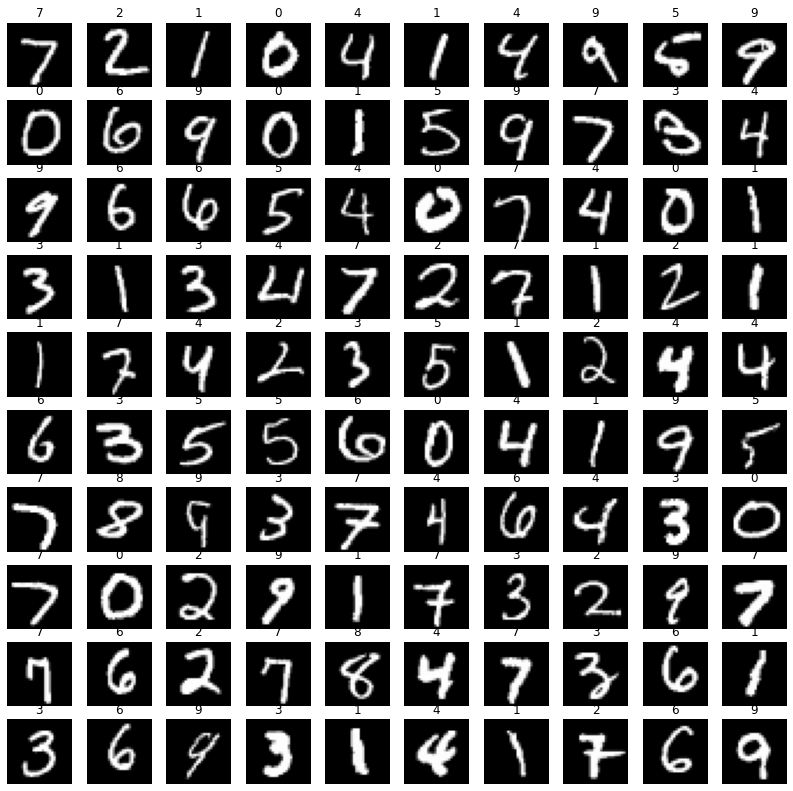

In [ ]:
fig = plt.figure(figsize=(14, 14))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(X_test[i], cmap="gray")
    ax.set_title(y_pred[i])
    ax.axis("off")

テストデータに対して97％近い正解率というのはどうも正しそうだ。

ちなみに今回扱った中間層ありのモデルは、**多層パーセプトロン（Multi Layer Perceptron）**という立派なディープラーニングのモデルである。

ここで学んだことは次の通りだ。

* 多層パーセプトロンでのMNISTの分類
* 画像分類での説明変数の意味
* 中間層での活性化関数
* タスクによる損失関数の違い

## 次の演習問題へ！
おめでとう！　これでディープラーニングの基本を一通り学ぶことができた。次は画像処理を通じて、畳み込みニューラルネットワークについて見ていこう。